Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

Accuracy score: 1.0


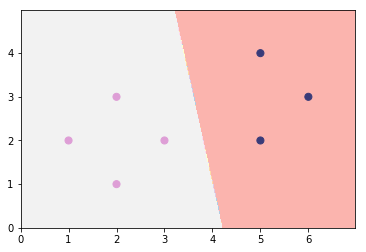

In [5]:
rc = RidgeClassifier(alpha=0)
rc.fit(seven_X, seven_y)
print("Accuracy score: " + str(accuracy_score(seven_y, rc.predict(seven_X))))
plot_2d_clf_problem(seven_X, seven_y, rc.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

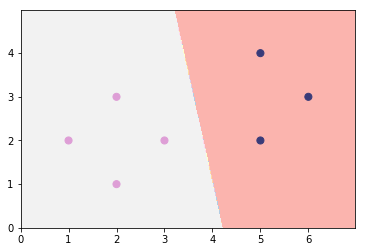

In [6]:
lr = LinearRegression()
lr.fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x : lr.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy score: 0.875


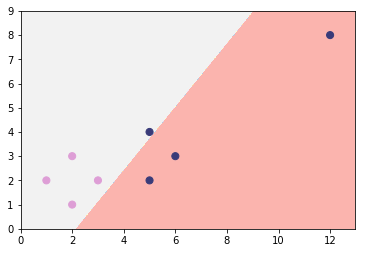

In [8]:
outlier_rc = RidgeClassifier(alpha=0)
outlier_rc.fit(outlier_X, outlier_y)
print("Accuracy score: " + str(accuracy_score(outlier_y, outlier_rc.predict(outlier_X))))
plot_2d_clf_problem(outlier_X, outlier_y, outlier_rc.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy score: 0.875


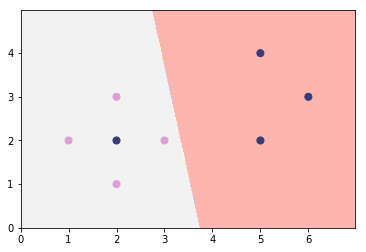

In [10]:
unsep_rc = RidgeClassifier(alpha=0)
unsep_rc.fit(unsep_X, unsep_y)
print("Accuracy score: " + str(accuracy_score(unsep_y, unsep_rc.predict(unsep_X))))
plot_2d_clf_problem(unsep_X, unsep_y, unsep_rc.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

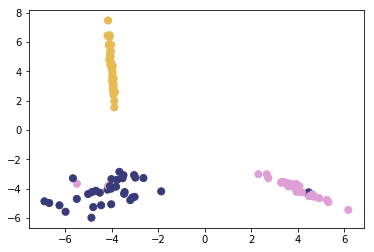

In [11]:
from sklearn.datasets import make_classification

multi_X, multi_y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, class_sep=4.0, shuffle=False)
plot_2d_clf_problem(multi_X, multi_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Granica za klasu 0:


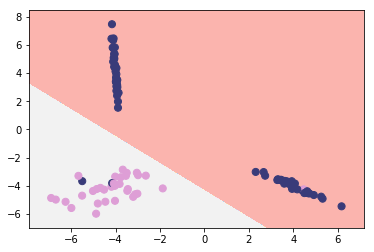

In [12]:
h0_y = []
h1_y = []
h2_y = []
class CustomClassification:
    
    def __init__(self, h0_rc, h1_rc, h2_rc):
        self.h0_rc = h0_rc
        self.h1_rc = h1_rc
        self.h2_rc = h2_rc
    
    def predict(self, multi_X):
        h0_y = self.h0_rc.predict(multi_X)
        h1_y = self.h1_rc.predict(multi_X)
        h2_y = self.h2_rc.predict(multi_X)
        ret_y = []
        for i in range(len(h0_y)):
            comp = np.array([h0_y[i], h1_y[i], h2_y[i]])
            ret_y.append(np.argmax(comp))
        return np.array(ret_y)

for y in multi_y:
    if y == 2:
        h0_y.append(0)
        h1_y.append(0)
        h2_y.append(1)
    if y == 1:
        h0_y.append(0)
        h1_y.append(1)
        h2_y.append(0)
    if y == 0:
        h0_y.append(1)
        h1_y.append(0)
        h2_y.append(0)
h0_rc = LinearRegression()
h1_rc = LinearRegression()
h2_rc = LinearRegression()
h0_rc.fit(multi_X, h0_y)
h1_rc.fit(multi_X, h1_y)
h2_rc.fit(multi_X, h2_y)
print("Granica za klasu 0:")
plot_2d_clf_problem(multi_X, h0_y, lambda x : h0_rc.predict(x) >= 0.5)

Granica za klasu 1:


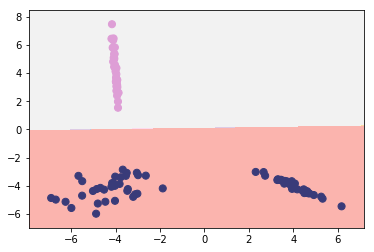

In [13]:
print("Granica za klasu 1:")
plot_2d_clf_problem(multi_X, h1_y, lambda x : h1_rc.predict(x) >= 0.5)

Granica za klasu 2:


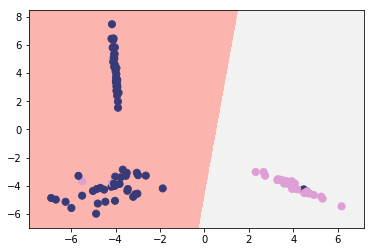

In [14]:
print("Granica za klasu 2:")
plot_2d_clf_problem(multi_X, h2_y, lambda x : h2_rc.predict(x) >= 0.5)

Koristeći RidgeClassifier direktno:


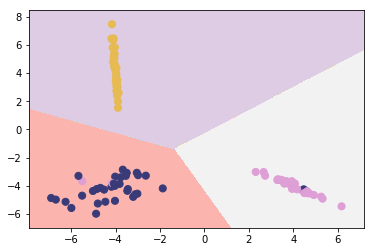

In [15]:
print("Koristeći RidgeClassifier direktno:")
multi_rc = RidgeClassifier(alpha=0)
multi_rc.fit(multi_X, multi_y)
plot_2d_clf_problem(multi_X, multi_y, multi_rc.predict)

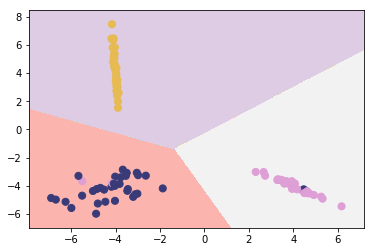

In [16]:
cc = CustomClassification(h0_rc, h1_rc, h2_rc)
plot_2d_clf_problem(multi_X, multi_y, cc.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

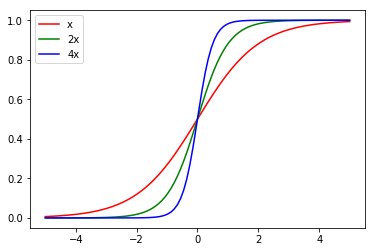

In [17]:
def sigm(x):
    return 1.0 / (1 + np.exp(-x))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, sigm(xs), 'r', label="x")
plt.plot(xs, sigm(2*xs), 'g', label="2x")
plt.plot(xs, sigm(4*xs), 'b', label="4x")
plt.legend(loc="best")
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [79]:
def lr_h(x, w):
    exp_X = np.insert(x, 0, 1)
    return sigm(np.dot(np.transpose(w), exp_X))

def cross_entropy_error(X, y, w):
    err = 0.0
    for Xi, yi in zip(X, y):
        err = err - (yi * np.log(lr_h(Xi, w)) + (1 - yi) * np.log(1 - lr_h(Xi, w)))
    return err / np.shape(seven_X)[0]
    
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    W = np.zeros(len(X[0]))
    W0 = 0
    matrix_W = np.array([np.insert(W, 0, W0)])
    current_iter = 0
    last_err = cross_entropy_error(X, y, np.insert(W, 0, W0))
    err_diff = cross_entropy_error(X, y, np.insert(W, 0, W0))
    while (current_iter <= max_iter) and (err_diff >= epsilon):
        delta_W = np.zeros(len(X[0]))
        delta_W0 = 0
        for Xi, yi in zip(X, y):
            f = lr_h(Xi, np.insert(W, 0, W0)) - yi
            delta_W = delta_W + f*Xi
            delta_W0 = delta_W0 + f
        W0 = W0 - eta * delta_W0
        W = (1-eta*alpha)*W - eta * delta_W
        matrix_W = np.append(matrix_W, [np.insert(W, 0, W0)], axis=0)
        current_iter += 1
        new_err = cross_entropy_error(X, y, np.insert(W, 0, W0))
        err_diff = last_err - new_err
        last_err = new_err
    if(trace):
        return matrix_W
    else:
        return np.insert(W, 0, W0)

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Pogreška unakrsne entropije: 0.135218727202


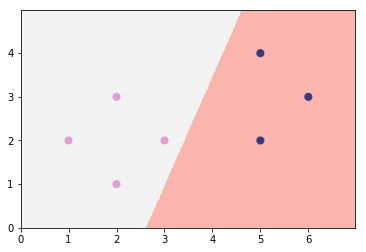

In [80]:
seven_W = lr_train(seven_X, seven_y, max_iter=3000, trace=False)
plot_2d_clf_problem(seven_X, seven_y, lambda x : lr_h(x, seven_W) >= 0.5)
print("Pogreška unakrsne entropije: " + str(cross_entropy_error(seven_X, seven_y, seven_W)))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

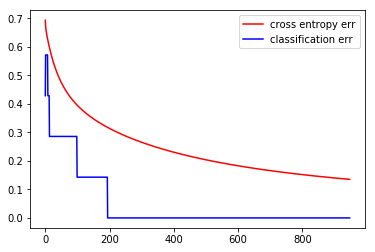

In [81]:
def classification_error(X, y, w):
    err = 0.0
    for Xi, yi in zip(X, y):
        hresult = lr_h(Xi, w)
        if ((hresult >= 0.5) and (yi == 0)) or ((hresult < 0.5) and (yi == 1)):
            err += 1
    return err / np.shape(seven_X)[0]

iter_matrix_W = lr_train(seven_X, seven_y, max_iter=3000, trace=True)
iterations = np.linspace(0, len(iter_matrix_W)-1, len(iter_matrix_W), dtype=int)
entr_errors = []
class_errors = []
for i in iterations:
    entr_errors.append(cross_entropy_error(seven_X, seven_y, iter_matrix_W[i]))
    class_errors.append(classification_error(seven_X, seven_y, iter_matrix_W[i]))
plt.plot(iterations, entr_errors, 'r', label="cross entropy err")
plt.plot(iterations, class_errors, 'b', label="classification err")
plt.legend(loc="best")
plt.show()

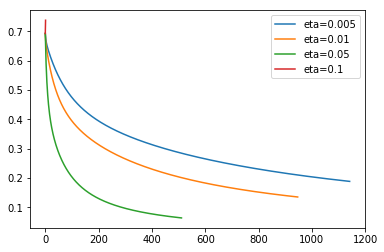

In [82]:
for eta in [0.005, 0.01, 0.05, 0.1]:
    iter_W = lr_train(seven_X, seven_y, eta=eta, max_iter=3000, trace=True)
    iterations = np.linspace(0, len(iter_W)-1, len(iter_W), dtype=int)
    entr_errors = []
    for i in iterations:
        entr_errors.append(cross_entropy_error(seven_X, seven_y, iter_W[i]))
    plt.plot(iterations, entr_errors, label="eta=" + str(eta))
plt.legend(loc="best")
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

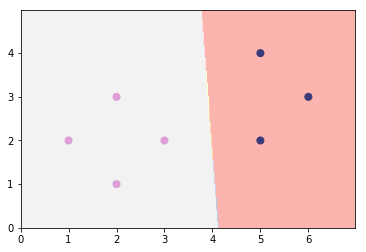

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, C=sys.maxsize)
lr.fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lr.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

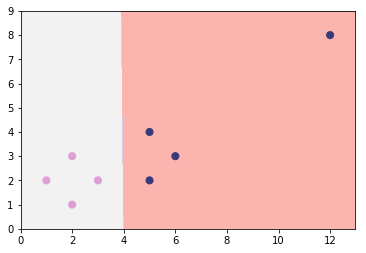

In [106]:
outlier_lr = LogisticRegression(max_iter=3000, C=sys.maxsize)
outlier_lr.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, outlier_lr.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


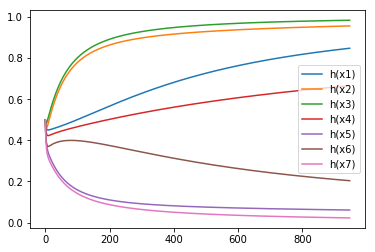

In [85]:
iter_W = lr_train(seven_X, seven_y, max_iter=3000, trace=True)
iterations = np.linspace(0, len(iter_W)-1, len(iter_W), dtype=int)
x1_predict=[]
x2_predict=[]
x3_predict=[]
x4_predict=[]
x5_predict=[]
x6_predict=[]
x7_predict=[]
for i in iterations:
    x1_predict.append(lr_h(seven_X[0], iter_W[i]))
    x2_predict.append(lr_h(seven_X[1], iter_W[i]))
    x3_predict.append(lr_h(seven_X[2], iter_W[i]))
    x4_predict.append(lr_h(seven_X[3], iter_W[i]))
    x5_predict.append(lr_h(seven_X[4], iter_W[i]))
    x6_predict.append(lr_h(seven_X[5], iter_W[i]))
    x7_predict.append(lr_h(seven_X[6], iter_W[i]))
plt.plot(iterations, x1_predict, label="h(x1)")
plt.plot(iterations, x2_predict, label="h(x2)")
plt.plot(iterations, x3_predict, label="h(x3)")
plt.plot(iterations, x4_predict, label="h(x4)")
plt.plot(iterations, x5_predict, label="h(x5)")
plt.plot(iterations, x6_predict, label="h(x6)")
plt.plot(iterations, x7_predict, label="h(x7)")
plt.legend(loc="best")
plt.show()

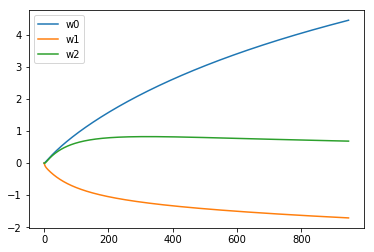

In [86]:
transpose_W = iter_W.transpose()
plt.plot(iterations, transpose_W[0], label="w0")
plt.plot(iterations, transpose_W[1], label="w1")
plt.plot(iterations, transpose_W[2], label="w2")
plt.legend(loc="best")
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

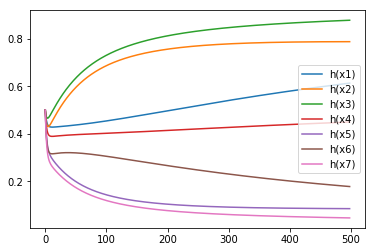

In [87]:
unsep_iter_W = lr_train(unsep_X, unsep_y, max_iter=3000, trace=True)
iterations = np.linspace(0, len(unsep_iter_W)-1, len(unsep_iter_W), dtype=int)
x1_predict=[]
x2_predict=[]
x3_predict=[]
x4_predict=[]
x5_predict=[]
x6_predict=[]
x7_predict=[]
for i in iterations:
    x1_predict.append(lr_h(unsep_X[0], unsep_iter_W[i]))
    x2_predict.append(lr_h(unsep_X[1], unsep_iter_W[i]))
    x3_predict.append(lr_h(unsep_X[2], unsep_iter_W[i]))
    x4_predict.append(lr_h(unsep_X[3], unsep_iter_W[i]))
    x5_predict.append(lr_h(unsep_X[4], unsep_iter_W[i]))
    x6_predict.append(lr_h(unsep_X[5], unsep_iter_W[i]))
    x7_predict.append(lr_h(unsep_X[6], unsep_iter_W[i]))
plt.plot(iterations, x1_predict, label="h(x1)")
plt.plot(iterations, x2_predict, label="h(x2)")
plt.plot(iterations, x3_predict, label="h(x3)")
plt.plot(iterations, x4_predict, label="h(x4)")
plt.plot(iterations, x5_predict, label="h(x5)")
plt.plot(iterations, x6_predict, label="h(x6)")
plt.plot(iterations, x7_predict, label="h(x7)")
plt.legend(loc="best")
plt.show()

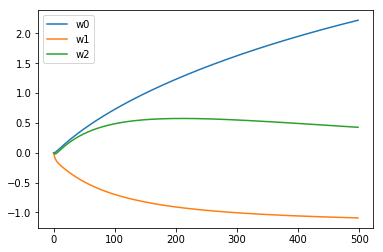

In [88]:
unsep_transpose_W = unsep_iter_W.transpose()
plt.plot(iterations, unsep_transpose_W[0], label="w0")
plt.plot(iterations, unsep_transpose_W[1], label="w1")
plt.plot(iterations, unsep_transpose_W[2], label="w2")
plt.legend(loc="best")
plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [92]:
from numpy.linalg import norm

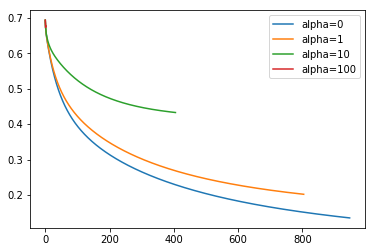

In [90]:
for alpha in [0, 1, 10, 100]:
    iter_W = lr_train(seven_X, seven_y, alpha=alpha, max_iter=3000, trace=True)
    iterations = np.linspace(0, len(iter_W)-1, len(iter_W), dtype=int)
    entr_errors = []
    for i in iterations:
        entr_errors.append(cross_entropy_error(seven_X, seven_y, iter_W[i]))
    plt.plot(iterations, entr_errors, label="alpha=" + str(alpha))
plt.legend(loc="best")
plt.show()

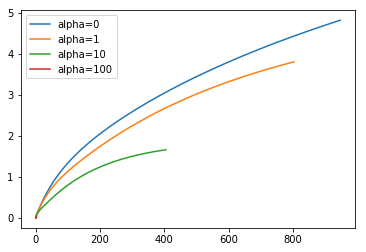

In [93]:
for alpha in [0, 1, 10, 100]:
    iter_W = lr_train(seven_X, seven_y, alpha=alpha, max_iter=3000, trace=True)
    iterations = np.linspace(0, len(iter_W)-1, len(iter_W), dtype=int)
    norms = []
    for i in iterations:
        norms.append(norm(iter_W[i]))
    plt.plot(iterations, norms, label="alpha=" + str(alpha))
plt.legend(loc="best")
plt.show()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [94]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

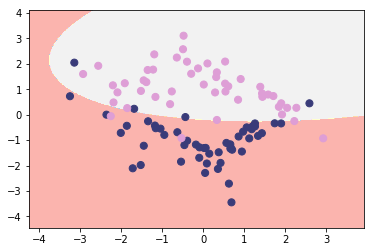

In [108]:
unlinear_X, unlinear_y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly2.fit(unlinear_X)
poly3.fit(unlinear_X)
lr2 = LogisticRegression(max_iter=3000, C=sys.maxsize)
lr3 = LogisticRegression(max_iter=3000, C=sys.maxsize)
lr2.fit(poly2.transform(unlinear_X), unlinear_y)
lr3.fit(poly3.transform(unlinear_X), unlinear_y)
plot_2d_clf_problem(unlinear_X, unlinear_y, lambda x : lr2.predict(poly2.transform(x)))

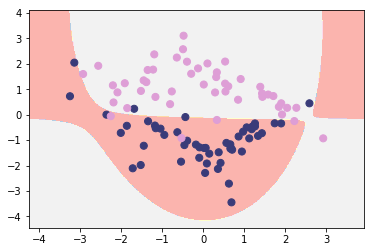

In [109]:
plot_2d_clf_problem(unlinear_X, unlinear_y, lambda x : lr3.predict(poly3.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?